## Linear Regression using Gradient Descent

In this tutorial, we will be writing the code from scratch for Linear Regression using the Second Approach that we studied i.e. using Gradient Descent and then we will move on to plotting the "Best Fit Line".
So, let's get started.

### Step-1 Import Dependencies

Numpy: for numerical calculations

Pandas: to load the data and modify it

Matplotlib: to plot the data

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We discussed in the starting tutorials that a straight line is represented by the equation: 
##### y = mx + b
where,
#### m: Slope of the line
#### b: bias


### Step-2: Load Dataset

Let's firstly load the dataset. We would like to see if the dataset is balanced or not, how many elements it has in each column, the min, max and mean values.

Here, we will be using the same "Swedish Insurance Dataset" for this to make a comparison from the previous code.

So, let's get started.

In [2]:
# Load the data using Pandas

df = pd.read_csv('dataset/Insurance-dataset.csv')

In [3]:
# Let's have a look at the data, what it looks like, how many data points are there in the data.

print(df.head())

     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


Data is in the form of two columns, X and Y. X is the total number of claims and Y represents the claims in thousands of Swedish Kronor.

Now, let's describe our data.

In [4]:
# Describe the Data

df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


So, both the columns have equal number of data points. Hence, the dataset is stable. No need to modify the data. We also get the mean, max values in both columns etc.

Now, let's put the data in the form to be input to the function we just defined above.

In [5]:
# Load the data in the form to be input to the function for Best Fit Line

X = np.array(df['X'], dtype=np.float64)
y = np.array(df['Y'], dtype=np.float64)

### Step-3: Scatter Plot of Input Data
Before going any further, let's first plot our data and see if it's linear or not. Remember, we require linear data to plot a best fit line and neglect the Outliers.

So, let's plot the data.

Text(0.5,1,'Input Data Scatter Plot')

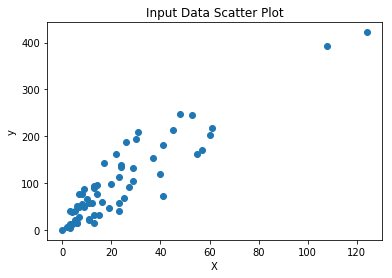

In [6]:
# Scatter Plot of the Input Data

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Input Data Scatter Plot')

From the above plot, we can see that the data is pretty linear except for 1 or 2 points. But that's ok. We can work with that.


### Step-4: Cost Function

Let's now define the Cost Function for Linear Regression. As we have seen in the last post for Gradient Descent for Linear Regression, we defined the Cost Function as follows:

#### Cost Function [J] = (1/2n) * sum((y_hat-y)^2)

where
#### n: Total number of data points in the Input.
#### y_hat: Predicted values of y using value of "m" and "b" obtained from Gradient Descent.
#### y: Input data points with label "y"

So, let's define this function.

In [7]:
# Cost Function
# Cost Function [J] = (1/2n) * (sum((y_hat-y)**2))
# where,
# n: total number of items in a column of dataset. i.e. 63 in this case.
# len(X): Taking the length of column X gives us the value of "n"0

def cost_Function(m,b,X,y):
    return sum(((m*X + b) - y)**2)/(2*float(len(X)))


Now, since we have the function to calculate the cost, the next step is ofcourse to get the values for "m" and "b". But, here, unlike the previous code, we'll be using Gradient Descent to iteratively go over the values and find the best value for "m" and "b" to get the "Best Fit Line".

So, let's get started.

What are the equations for Gradient Descent ??

Well, we saw in the post that to find the values of "m" and "b" using Gradient Descent, we first need to find the gradient or the derivative of the cost function w.r.t m and b.

So, the equation that we get are:

#### dJ/dm = (1/n) * X * ((m*X+b)-y)

#### dJ/db = (1/n) * ((m*X+b)-y) * 1

After this, we update the values of "m" and "b" simultaneously. i.e. firstly we get the derivative values and then update "m" and "b" at once as:

#### m = m - alpha*(dJ/dm)

#### b = b - alpha*(dJ/db)

where,

#### alpha: Learning Rate

Finding these values is fine. But we are just missing one small part for performing Gradient Descent. We cannot find the perfect value for "m" and "b" in a single iteration. It is a gradual process. Remember in the plot of Gradient Descent when we try to move down the slope of the Convex Function.

To reach the bottom/minima, we will require more than one iteration. Hence, we iterate over the equations defined above multiple times till the error cannot be reduced further.

Now, after all these equations, it's time to implement them.

In [8]:
# Gradient Descent
# X,y: Input Data Points
# m,b: Initial Slope and Bias
# alpha: Learning Rate
# iters: Number of Iterations for which we need to run Gradient Descent.

def gradientDescent(X,y,m,b,alpha,iters):
    # Initialize Values of Gradients
    gradient_m = 0
    gradient_b = 0
    # n: Number of items in a row
    n = float(len(X))
    a = 0
    # Array to store values of error for analysis
    hist = []
    # Perform Gradient Descent for iters
    for _ in range(iters):
        # Perform Gradient Descent
        for i in range(len(X)):
            gradient_m = (1/n) * X[i] * ((m*X[i] + b) - y[i])
            gradient_b = (1/n) * ((m*X[i] + b) - y[i])
        m = m - (alpha*gradient_m)
        b = b - (alpha*gradient_b)
        # Calculate the change in error with new values of "m" and "b"
        a = cost_Function(m,b,X,y)
        hist.append(a)
    return [m,b,hist]

So, now that we have performed the Gradient Descent, let's now run the code and provide initial values.

In [9]:
# Learning Rate
lr = 0.0001

# Initial Values of "m" and "b"
initial_m = 0
initial_b = 0

# Number of Iterations
iterations = 1000

print("Starting gradient descent...")

Starting gradient descent...


In [10]:
# Check error with initial Values of m and b

print("Initial Error at m = {0} and b = {1} is error = {2}".format(initial_m, initial_b, cost_Function(initial_m, initial_b, X, y)))

Initial Error at m = 0 and b = 0 is error = 8572.899206349208


In [11]:
# Run Gradient Descent to get new values for "m" and "b"

[m,b,hist] = gradientDescent(X, y, initial_m, initial_b, lr, iterations)

In [12]:
# New Values of "m" and "b" after Gradient Descent

print('Values obtained after {0} iterations are m = {1} and b = {2}'.format(iterations,m,b))

Values obtained after 1000 iterations are m = 4.743684676449634 and b = 0.18244941063267792


In [16]:
print(b)

0.18244941063267792


Now that we have obtained the new values for "m" and "b", it's time to plot the "Best Fit Line" and see how well it fits the data. To do that, we first need to get the values for y_hat.

#### y_hat = m*X + b

where "m" and "b" are the new values obtained after performing Gradient Descent.

In [13]:
# Calculating y_hat

y_hat = (m*X + b)

print('y_hat: ',y_hat)

y_hat:  [5.12500394e+02 9.03124583e+01 6.18503502e+01 5.88399349e+02
 1.89929836e+02 2.70572476e+02 1.09287197e+02 6.65940349e+01
 2.13648260e+02 4.76192962e+01 2.39008728e+01 2.27879314e+02
 5.23629809e+01 1.09287197e+02 3.33882421e+01 9.66981876e+00
 1.14030882e+02 2.86445575e+01 1.44135034e+01 1.09287197e+02
 2.86445575e+01 4.28756115e+01 4.28756115e+01 1.44135034e+01
 1.37749305e+02 3.33882421e+01 1.91571881e+01 9.50561429e+01
 3.33882421e+01 1.91571881e+01 1.82449411e-01 1.18774566e+02
 2.86445575e+01 2.39008728e+01 1.04543512e+02 5.23629809e+01
 2.89547215e+02 5.71066655e+01 1.91571881e+01 7.60814042e+01
 6.18503502e+01 2.84803530e+02 1.94673521e+02 1.75698782e+02
 2.61085107e+02 1.94673521e+02 5.23629809e+01 1.28261936e+02
 3.81319268e+01 1.44135034e+01 8.08250889e+01 6.18503502e+01
 6.18503502e+01 7.13377196e+01 3.81319268e+01 1.37749305e+02
 1.42492990e+02 1.14030882e+02 4.28756115e+01 1.47236674e+02
 6.65940349e+01 2.51597737e+02 1.23518251e+02]


In [15]:
print(b)

0.18244941063267792


Text(0.5,1,'Best Fit Line Plot')

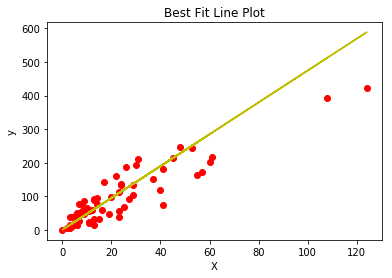

In [14]:
# Scatter Plot of the Input Data and Plot for Best Fit Line

fig,ax = plt.subplots()
ax.scatter(X,y,c='r')
ax.plot(X,y_hat,c='y')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Best Fit Line Plot')

As we can clearly see that this line passes through most of the data points and is a Best Fit Line. Now, let's do our second test on this. let's take an arbitrary input and see if we are able to get a value for that.

In [39]:
# Testing using arbitrary Input Value

predict_X = 76
predict_y = (m*predict_X + b)

print('predict_y: ',predict_y)

predict_y:  360.702484821


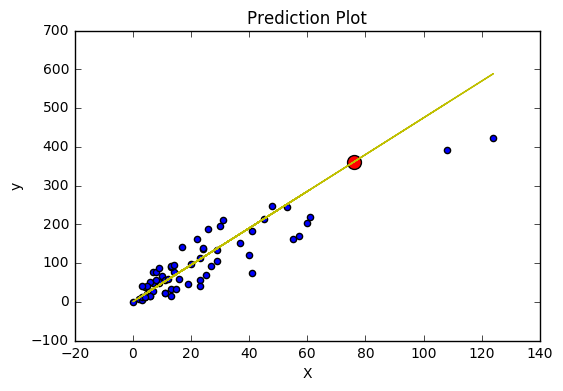

In [41]:
# Scatter Plot, Best Fit Line and Prediction Plot

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.scatter(predict_X,predict_y,c='r',s=100)
ax.plot(X,y_hat,c='y')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Prediction Plot')

Well, we can see that the line goes through the point or in other words, point lies on the line and that is what was the aim to get a Best Fit Line.

Great work till here. But let's also see how the error goes down !! Remember we used an extra variable and stored the cost_function values into an array. These values show how Gradient Descent moves down reducing the Cost Function.

So, let's plot it.

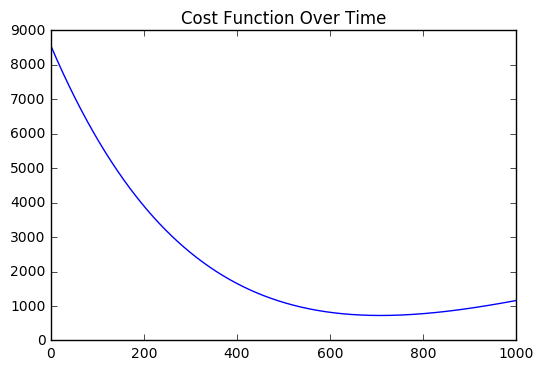

In [44]:
# Error Plot

fig,ax = plt.subplots()
ax.plot(hist)
ax.set_title('Cost Function Over Time')

As we can see that the Cost Function values decrease over time and near about 700, it starts to get saturated. Hence, even if we run the Gradient Descent Optimizer for near about 700 iterations, we will get the same results.

Well, this ends our coding section for this post.